# **California Housing Prices**

**Objetivo:** Neste projeto vamos trabalhar com o Data Frame de preços de casas da Califórnia, tentando compreender em qual bairro eu posso construir uma casa e vender pelo maior preço possível

## Importação

In [1]:
# libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

### Análise Exploratória

In [2]:
# Dados
df = pd.read_csv('./data/housing.csv')
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
# Informação dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# descrição dos dados
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Preparação de Dados

In [5]:
# Eliminando os valores nulos
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Biblioteca
from sklearn.preprocessing import OneHotEncoder


# Crie uma instância do OneHotEncoder
onehotencoder = OneHotEncoder(categories='auto', sparse_output=False, dtype='int32')

# Aplique a codificação one-hot na coluna 'ocean_proximity'
ohe = onehotencoder.fit_transform(df[['ocean_proximity']])

# Obtenha os nomes das categorias
categories = onehotencoder.categories_[0]

# Crie os nomes das colunas
column_names = [f"{category}" for category in categories]

# Crie o DataFrame resultante com as colunas codificadas
ohe_df = pd.DataFrame(ohe, columns=column_names)
ohe_df


,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [7]:
# Concatenando os dois data frame em um só
ds = pd.concat([df, ohe_df], axis=1)
ds.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [8]:
# Dividido o total de cômodos por família 
ds['total_rooms_per_households'] = ds['total_rooms'] / ds['households']
ds.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,total_rooms_per_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0,6.281853


In [9]:
# Dividido o total de quartos por família 
ds['total_bedrooms_per_households'] = ds['total_bedrooms'] / ds['households']
ds.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,total_rooms_per_households,total_bedrooms_per_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0,6.984127,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0,6.238137,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0,8.288136,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0,5.817352,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0,6.281853,1.081081


In [10]:
# Eliminado total_rooms, total_bedrooms e ocean_proximity
ds = ds.drop(['total_rooms', 'total_bedrooms', 'ocean_proximity'], axis=1)
ds.head(10)

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,total_rooms_per_households,total_bedrooms_per_households
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,6.281853,1.081081
5,-122.25,37.85,52.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0,4.761658,1.103627
6,-122.25,37.84,52.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0,4.931907,0.951362
7,-122.25,37.84,52.0,1157.0,647.0,3.1200,241400.0,0,0,0,1,0,4.797527,1.061824
8,-122.26,37.84,42.0,1206.0,595.0,2.0804,226700.0,0,0,0,1,0,4.294118,1.117647
9,-122.25,37.84,52.0,1551.0,714.0,3.6912,261100.0,0,0,0,1,0,4.970588,0.990196


### Plotagem de Dados - Gráficos 

c:\Labs\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


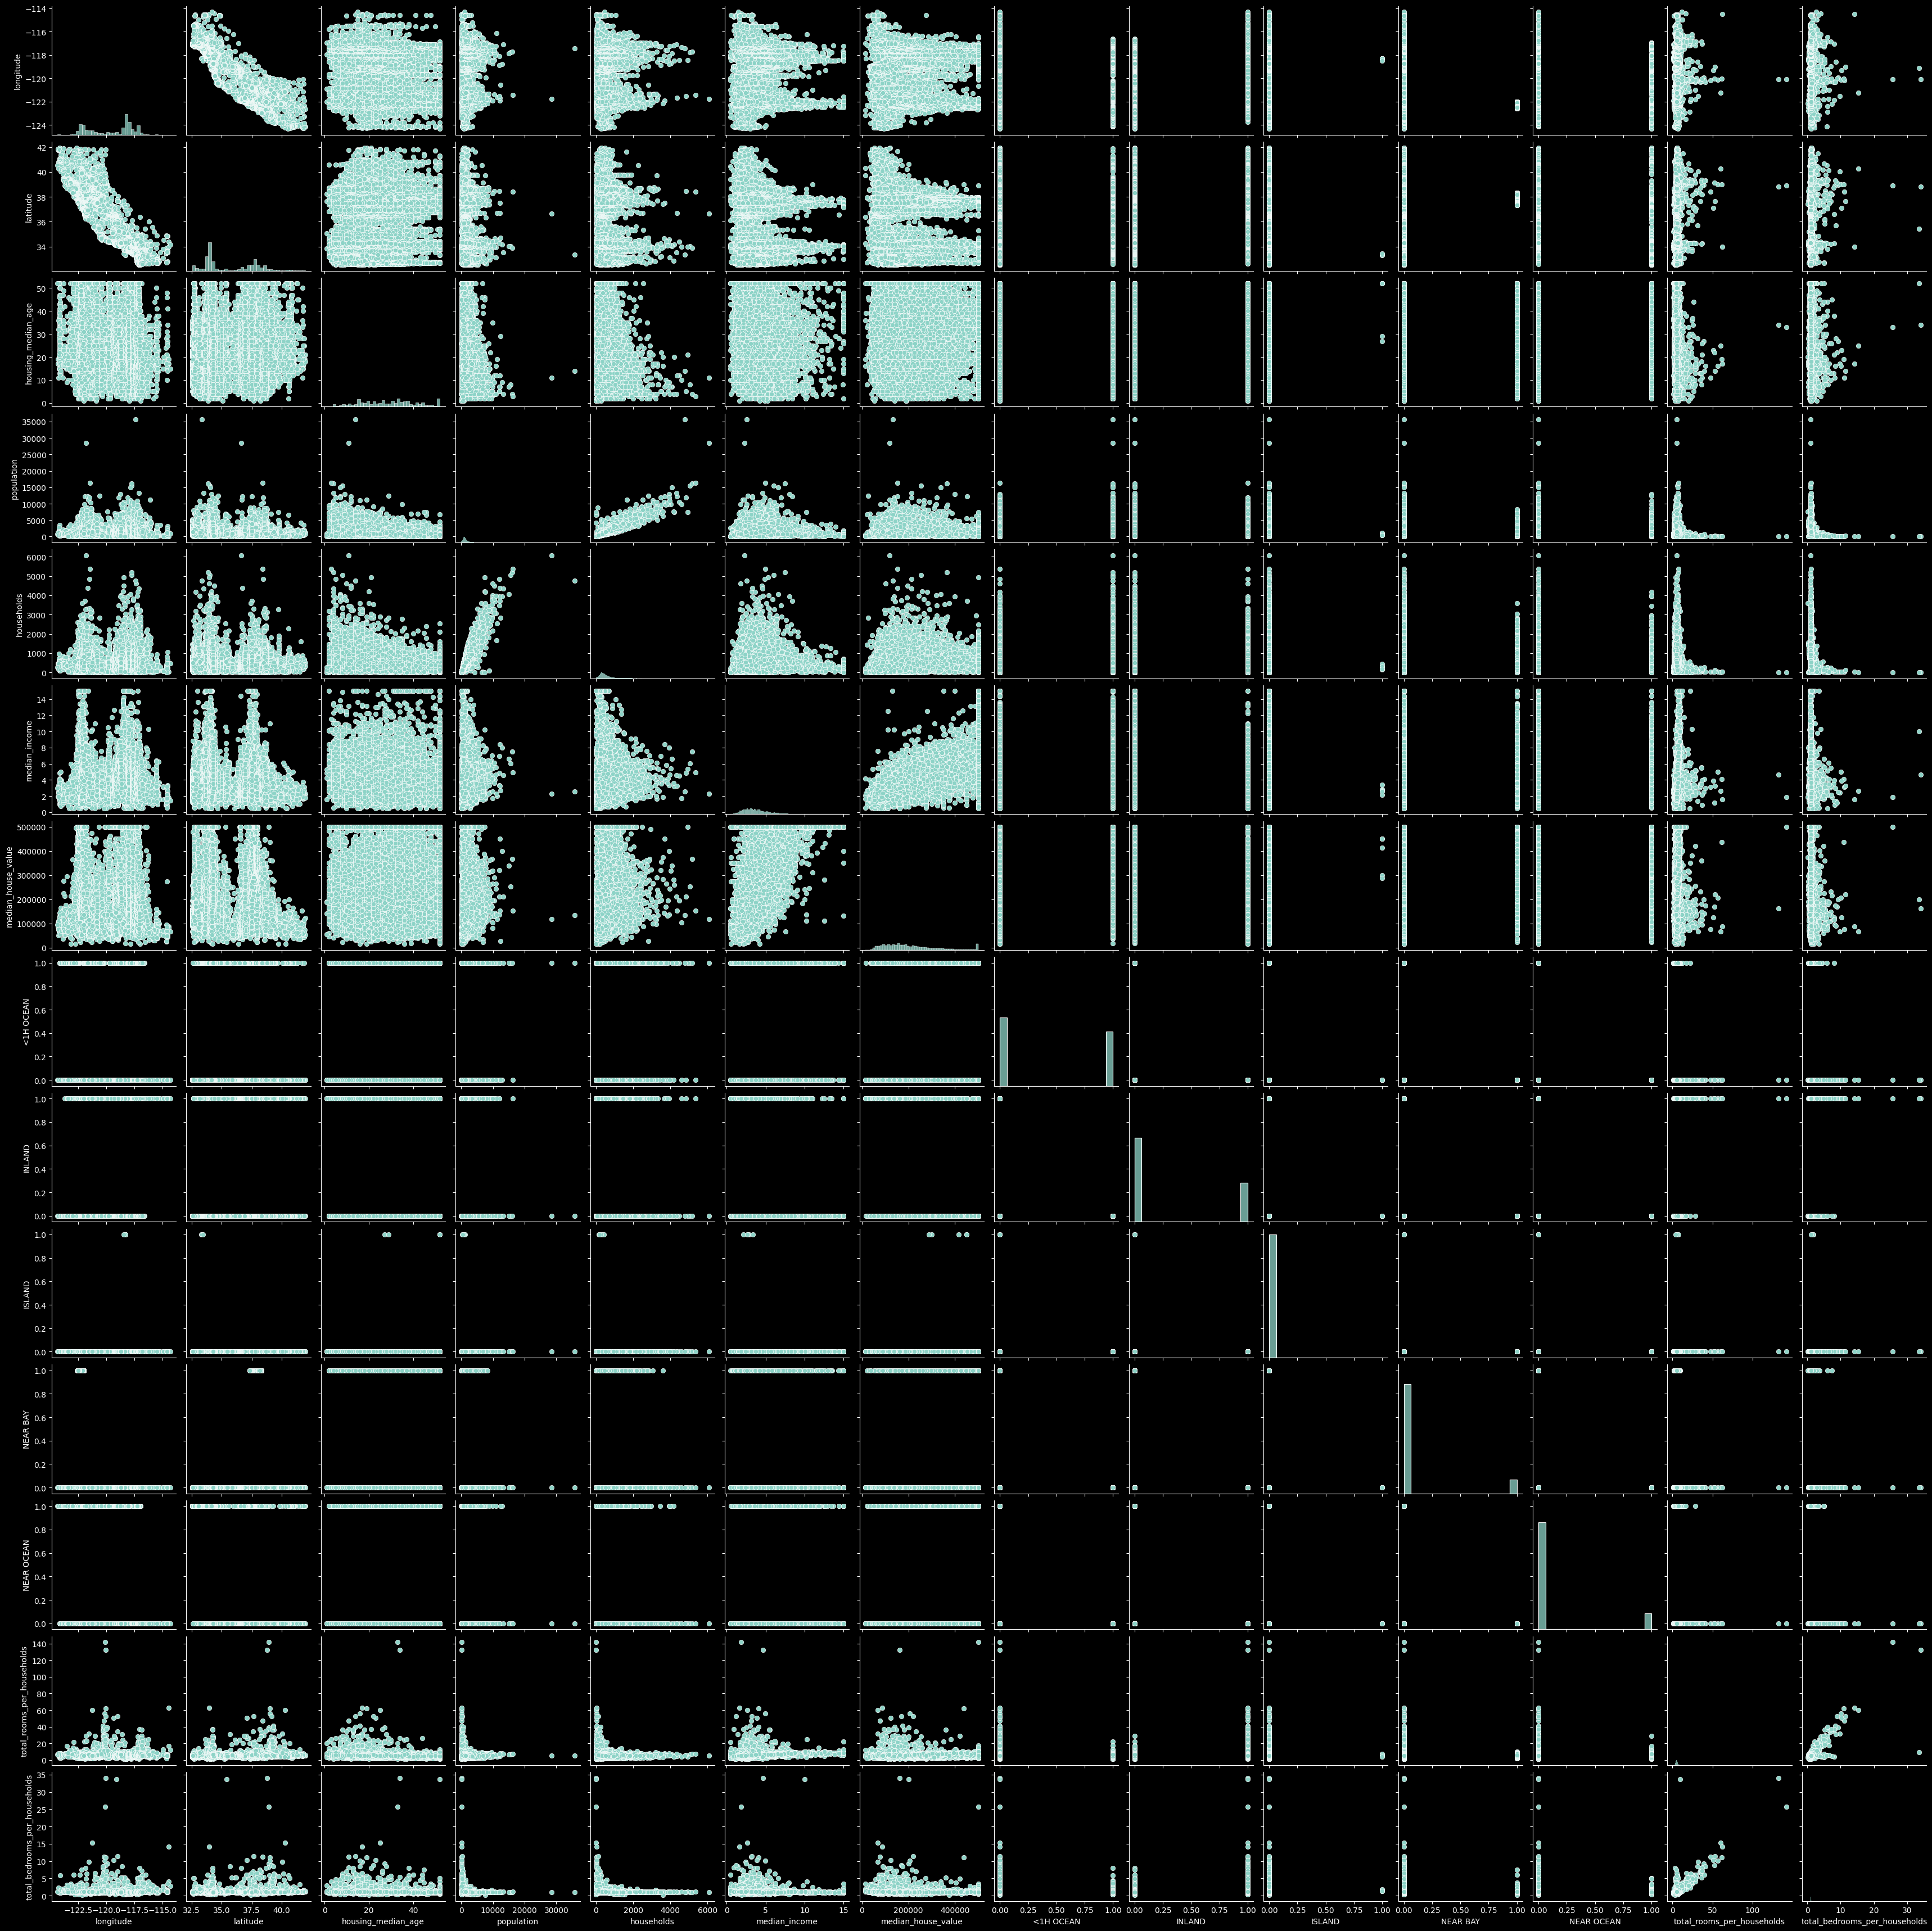

In [11]:
# pairplot para ter uma visão geral dos dados
sns.pairplot(ds)

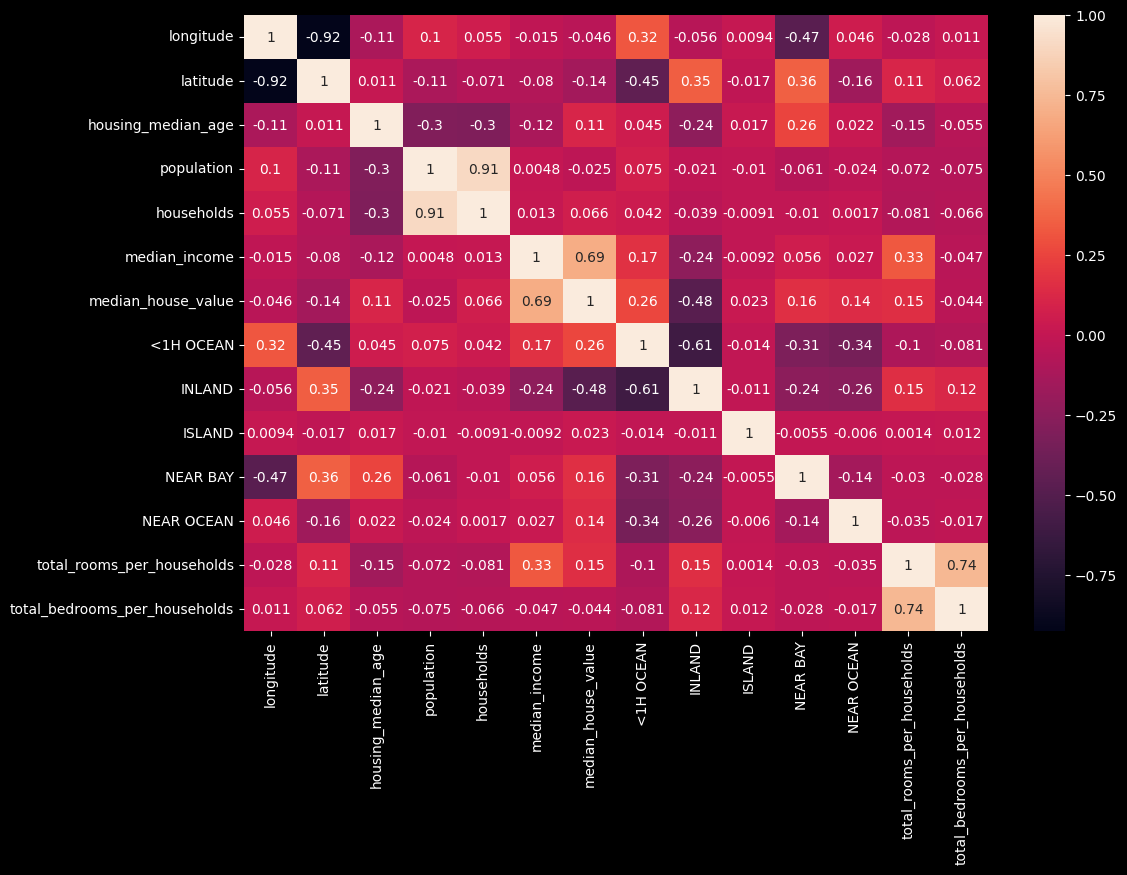

In [12]:
# Mapa de calor
plt.figure(figsize=(12,8))
sns.heatmap(ds.corr(),annot=True);

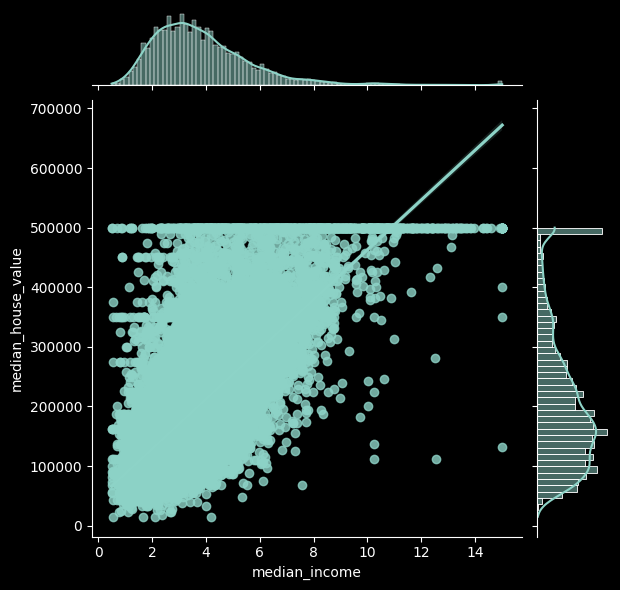

In [13]:
# Correlação de median_house_value e median_income
sns.jointplot(data=ds,y='median_house_value',x='median_income',kind='reg');

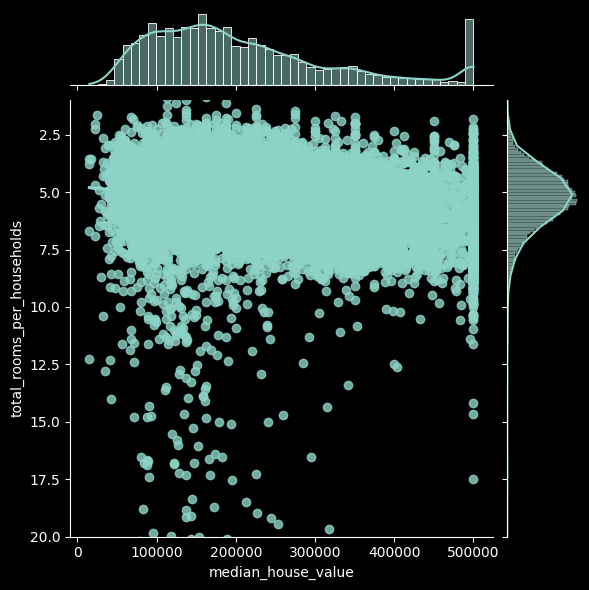

In [14]:
# Correlação de median_house_value e median_income
sns.jointplot(data=ds,x='median_house_value',y='total_rooms_per_households',kind='reg',ylim=20);

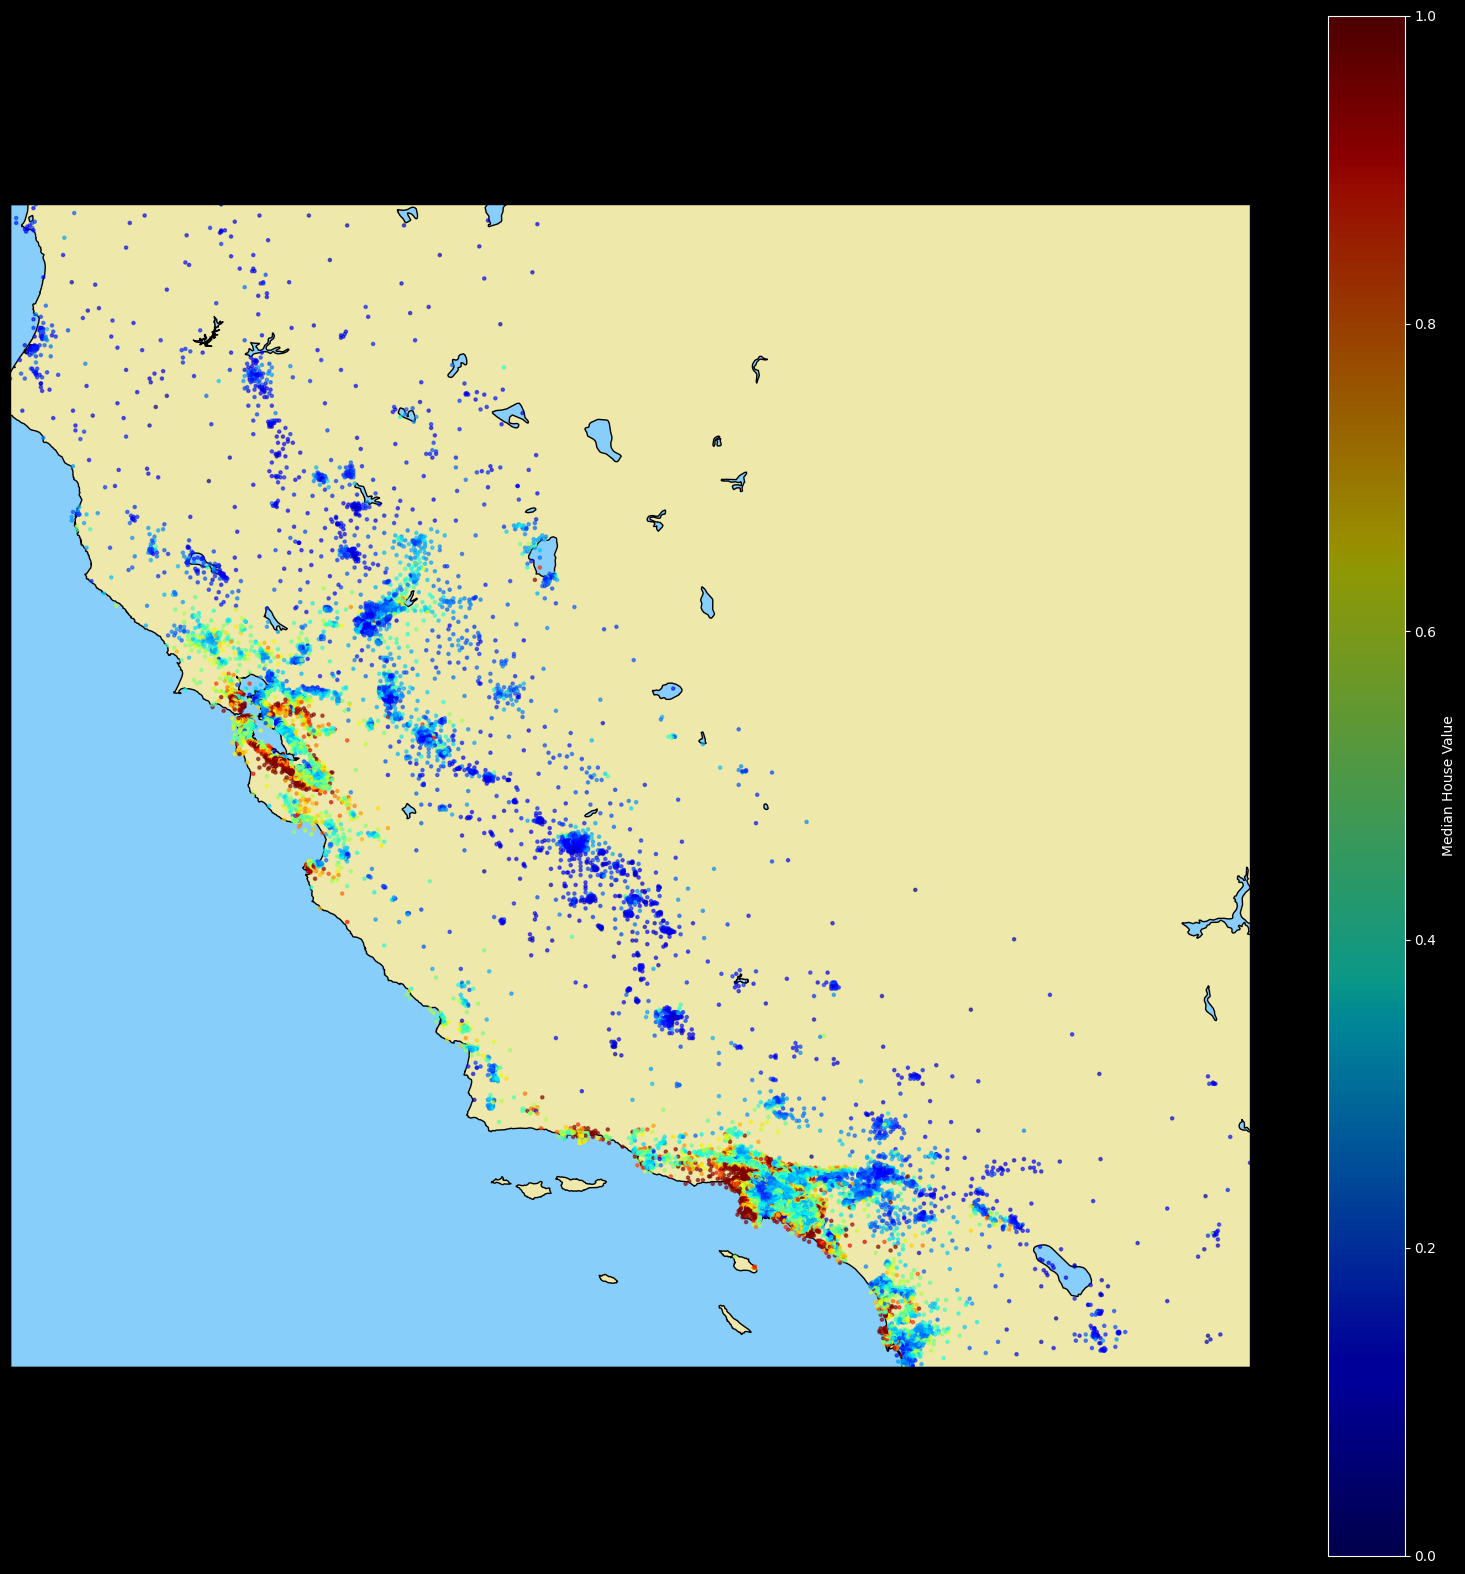

In [15]:
# Importações
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize

# plotando o mapa com a latitude e longitude
lat1, lat2 = ds['latitude'].min(),  ds['latitude'].max()
lon1, lon2 =  ds['longitude'].min(),  ds['longitude'].max()

# Normalizar os valores da coluna 'median_house_value' entre 0 e 1
normalized_median_house_value = (ds['median_house_value'] - ds['median_house_value'].min()) / (ds['median_house_value'].max() - ds['median_house_value'].min())

# Visualizando o mapa
plt.figure(figsize=(20, 20))
m = Basemap(projection='cyl', resolution='h',
            llcrnrlat=lat1, urcrnrlat=lat2,
            llcrnrlon=lon1, urcrnrlon=lon2)
m.drawcoastlines()
m.fillcontinents(color='palegoldenrod', lake_color='lightskyblue')
m.drawmapboundary(fill_color='lightskyblue')

# Usando Normalize para obter cores com base nos valores normalizados
norm = Normalize()
m.scatter(
    ds['longitude'], ds['latitude'], s=5,
    c=normalized_median_house_value, alpha=0.6, zorder=2,
    cmap=plt.get_cmap("jet"), norm=norm
)

# Adicionando uma barra de cores para referência
cbar = plt.colorbar(label='Median House Value')
plt.show()

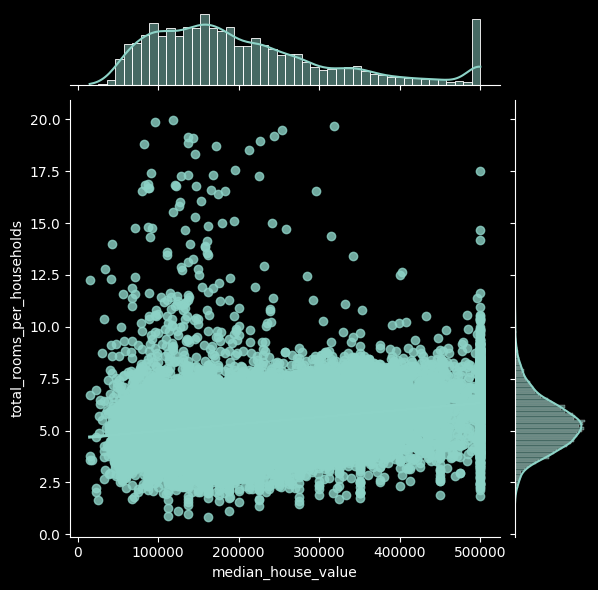

In [16]:
# Eliminando os ruido da coluna total_rooms_per_households
ds.drop(ds[ds['total_rooms_per_households']>20].index.to_list(),axis=0,inplace=True)
sns.jointplot(data=ds,x='median_house_value',y='total_rooms_per_households',kind='reg')

### Dados de Treino e Teste

In [17]:
# Valor de X e y
X = ds.drop(['median_house_value'], axis=1)
y = ds['median_house_value']
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20571, dtype: float64

In [18]:
# X de treino e teste e y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Tamanho de X e y
X_train.shape, X_test.shape

((16456, 13), (4115, 13))

### Escalonando os Dados

In [19]:
# Transformando os dados
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = sc.transform(X_test)
X_test = pd.DataFrame(X_test,columns=X.columns)

### Escolhendo melhor algorítimo

#### Regressão Linear

In [20]:
# Usando a Regressão Linear
ins = LinearRegression()
ins.fit(X_train, y_train)
pred = ins.predict(X_test)
pred[:10]

array([145416.79767353, 165397.74265167, 268323.27963208, 287437.70096675,
       124515.11302678, 244546.44082182, 212791.11164411, 216402.08457136,
       231820.65566367,  17886.17587149])

In [21]:
# Valor real
y_test[:10]

2547      70500.0
19467    163700.0
14960    181300.0
10758    500001.0
3316      93400.0
9934     194400.0
7437     168100.0
1013     204400.0
8097     157900.0
1868      87500.0
Name: median_house_value, dtype: float64

In [22]:
# Taxa de acerto da regressão Linear 
ins.score(X_test, y_test)

0.6570666369294529

In [23]:
# Raiz quadrada do erro-médio
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))

RMSE 67766.49707465147


In [24]:
# Usando a validação cruzada
cross = cross_val_score(ins,X_test,y_test,cv=10)
final = sum(cross) / len(cross)
final

0.6563040654124387

#### Árvores de Decisão

In [25]:
# Escolhendo os melhores parâmetros para a Árvores de Decisão
params = [
    {
        'criterion':['squared_error', 'poisson', 'absolute_error', 'friedman_mse'],
        'max_depth':[None,2,4,8,15]
    }
]
ins = DecisionTreeRegressor(criterion='poisson', max_depth=8)
# grid_search = GridSearchCV(ins,params,cv=5)
# grid_search.fit(X_train,y_train)
# grid_search.best_params_
ins.fit(X_train,y_train)
pred = ins.predict(X_test)

In [26]:
# Taxa de acertos
cross = cross_val_score(ins,X_test,y_test,cv=10)
print(f"Acertos {ins.score(X_test,y_test)}, RMSE: {np.sqrt(mean_squared_error(y_test,pred))} Validação cruzada {sum(cross) / len(cross)}")

Acertos 0.7284756533587764, RMSE: 60299.617387524326 Validação cruzada 0.6379963133624762


#### Florestas Aleatórias

In [27]:
# Escolhendo os melhores parâmetros para a Florestas Aleatórias
params = [
    {
        'criterion':['squared_error', 'poisson', 'absolute_error', 'friedman_mse'],
        'max_depth':[None,2,4,8]
    }
]
ins = RandomForestRegressor()
# grid_search = GridSearchCV(ins,params,cv=5)
# grid_search.fit(X_train,y_train)
# grid_search.best_params_
ins.fit(X_train,y_train)
pred = ins.predict(X_test)

In [28]:
# Taxa de acertos
cross = cross_val_score(ins,X_test,y_test,cv=10)
print(f"Acertos {ins.score(X_test,y_test)}, RMSE: {np.sqrt(mean_squared_error(y_test,pred))} Validação cruzada {sum(cross) / len(cross)}")

Acertos 0.8294547748101588, RMSE: 47789.22088532663 Validação cruzada 0.7659959670032249


#### KNN

In [29]:
# Escolhendo os melhores parâmetros para a KNN
params = [
    {
        'weights':['uniform','distance'],
        'n_neighbors':[2,5,10,15,20,30]
    }
]
ins = KNeighborsRegressor(n_neighbors=10, weights='distance')
# grid_search = GridSearchCV(ins,params,cv=5)
# grid_search.fit(X_train,y_train)
# grid_search.best_params_
ins.fit(X_train,y_train)
pred = ins.predict(X_test)

In [30]:
# Taxa de acertos
cross = cross_val_score(ins,X_test,y_test,cv=10)
print(f"Acertos {ins.score(X_test,y_test)}, RMSE: {np.sqrt(mean_squared_error(y_test,pred))} Validação cruzada {sum(cross) / len(cross)}")

Acertos 0.7424222234666236, RMSE: 58730.58987063613 Validação cruzada 0.6906363562484144


#### SVM

In [31]:
# Escolhendo os melhores parâmetros para a SVM
params = [
    {
        'C':[0.1,1,10],
        'gamma':[0.1,1,10]
    }
]
ins = SVR(C=10, gamma=0.1)
# grid_search = GridSearchCV(ins,params,cv=5)
# grid_search.fit(X_train,y_train)
# grid_search.best_params_
ins.fit(X_train,y_train)
pred = ins.predict(X_test)

In [32]:
# Taxa de acertos
cross = cross_val_score(ins,X_test,y_test,cv=10)
print(f"Acertos {ins.score(X_test,y_test)}, RMSE: {np.sqrt(mean_squared_error(y_test,pred))} Validação cruzada {sum(cross) / len(cross)}")

Acertos 0.02032474994308653, RMSE: 114538.4326765261 Validação cruzada -0.03753479274241198


### Testando em Dados Reais

In [33]:
# Teinado o modelo
ins = RandomForestRegressor()
ins.fit(X_train,y_train)

RandomForestRegressor()

In [34]:
# Criando um novo data frame
dfReal = pd.DataFrame(columns=X.columns.to_list(),
    data=[[
        '-118.35', '34.06', '37.0', '2250.0', '367.0', '8.6745', '0', '0', '0', '1', '0', '6.984127', '1.023810'
        ]
    ]
)
dfReal

,longitude,latitude,housing_median_age,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,total_rooms_per_households,total_bedrooms_per_households
0,-118.35,34.06,37.0,2250.0,367.0,8.6745,0,0,0,1,0,6.984127,1.023810


In [35]:
# Fazendo a previsão
pred = ins.predict(dfReal)
pred

array([410128.49])